## Figure Production

Purpose of this notebook is demonstrate how to reproduce the figures used in the Tensor Sandwich: Tensor Completion for Low CP-Rank Tensors via Adaptive Random Sampling submission.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import glob

Load the raw data from the trials from the rank study csv, group and than average the trials.

In [11]:
#data types for the columns
col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'SNR':float, 
             'slices':int,  
             'alpha':float, 
             'beta':float, 
             'delta':float, 
             'gamma':float,
             'rel_error':float,
             'matrix budget':int,
             'total budget':int,
             'revealed':float}

#read in the data, give columns data types, group and aggregate
rank_study_sand_df = pd.read_csv('rank_study_sandwich.csv').astype(col_types).groupby(['r','gamma'])
rank_study_summary_sand = rank_study_sand_df.agg({'trial':'count',
                                           'n':'min', 
                                           'SNR':'min',
                                           'slices':'min',
                                           'alpha':'min',
                                           'beta':'min',
                                           'delta':'min',
                                           'rel_error':'median',
                                           'matrix budget':'mean',
                                           'total budget':'mean',
                                           'revealed':'mean'})
#undo multi index with an index reset
rank_study_summary_sand = rank_study_summary_sand.reset_index()

Now produce the Figure 1 by plotting for each rank present the relative error by percent entries revealed

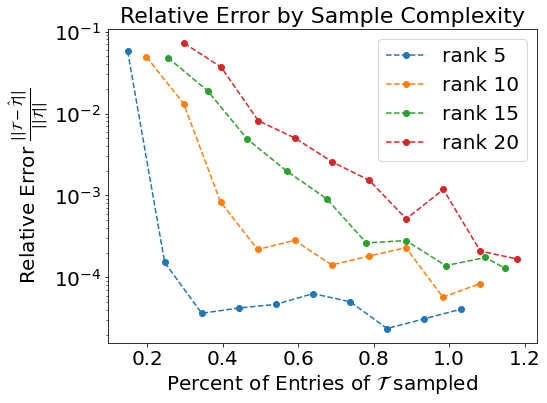

In [12]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
plt.rcParams['font.size'] = 20
df=rank_study_summary_sand
for r in df['r'].unique(): 
        ax.plot(100*df[df['r']==r]['revealed'],df[df['r']==r]['rel_error'], '--o',label='rank '+str(r))
    
ax.set_title("Relative Error by Sample Complexity", fontsize=22)
ax.set(xlabel=r"Percent of Entries of $\mathcal{T}$ sampled", ylabel=r"Relative Error $\frac{\||\mathcal{T}-\mathcal{\hat{T}}\||}{\||\mathcal{T}\||}$",yscale='log')
ax.legend()
fig.tight_layout()
plt.show()


Figure 2 takes in the data with varying SNR levels and plots their relative errors

In [4]:
#data types for the columns
col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'SNR':float, 
             'slices':int,  
             'alpha':float, 
             'beta':float, 
             'delta':float, 
             'gamma':float,
             'rel_error':float,
             'matrix budget':int,
             'total budget':int,
             'revealed':float}

#read in the data, give columns data types, group and aggregate
noise_study_sand_df = pd.read_csv('noise_study_sandwich_032.csv').astype(col_types).groupby(['r','SNR'])
noise_study_summary_sand = noise_study_sand_df.agg({'trial':'count',
                                           'n':'min', 
                                           'slices':'min',
                                           'alpha':'min',
                                           'beta':'min',
                                           'delta':'min',
                                           'gamma':'min',
                                           'rel_error':'median',
                                           'matrix budget':'mean',
                                           'total budget':'mean',
                                           'revealed':'mean'})
#reset index to undo multi-indexing
noise_study_summary_sand = noise_study_summary_sand.reset_index()

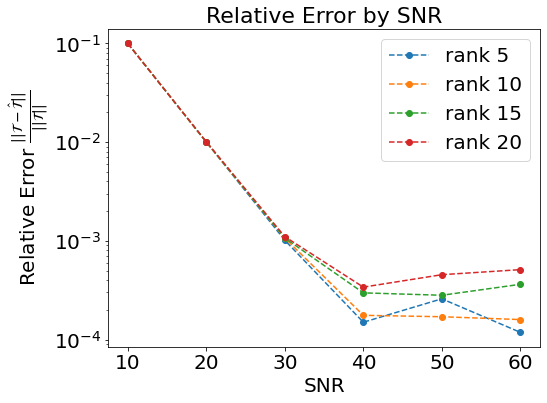

In [5]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
plt.rcParams['font.size'] = 20
df=noise_study_summary_sand
for r in df['r'].unique(): 
        ax.plot(df[df['r']==r]['SNR'],df[df['r']==r]['rel_error'], '--o',label='rank '+str(r))
    
ax.set_title("Relative Error by SNR", fontsize=22)
ax.set(xlabel="SNR", ylabel=r"Relative Error $\frac{\||\mathcal{T}-\mathcal{\hat{T}}\||}{\||\mathcal{T}\||}$",yscale='log')
ax.legend()
fig.tight_layout() 
plt.show()


Same setup as before, only now load the ALS, TS and TS+ALS data

In [6]:
col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'SNR':float, 
             'mode':str,
             'slices':int,
             'alpha':float,
             'beta':float,
             'delta':float,
             'gamma':float,
             'max_iter':int,
             'time':float,
             'rel_error_sandwich':float,
             'matrix budget':int,
             'total budget':int,
             'revealed':float,
             'rel_error_post_als':float,
             'rel_error_just_als':float}

#read in, type the columns, aggregate
df_mix_noise = pd.read_csv("sand_als_rank_study_032.csv").astype(col_types).groupby(['r','SNR'])
noise_study_summary_mix = df_mix_noise.agg({'trial':'max', 
             'n':'min', 
             'mode':'min',
             'slices':'min',
             'alpha':'min',
             'beta':'min',
             'delta':'min',
             'gamma':'min',                             
             'max_iter':'min',
             'time':'mean',
             'rel_error_sandwich':'median',
             'matrix budget':'min',
             'total budget':'mean',
             'revealed':'mean',
             'rel_error_post_als':'median',
             'rel_error_just_als':'median'})

noise_study_summary_mix = noise_study_summary_mix.reset_index()

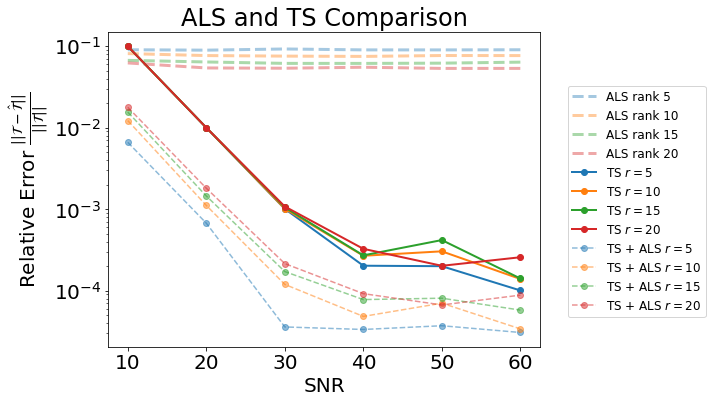

In [7]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
plt.rcParams['font.size'] = 20
#fig.suptitle("Relative Error by SNR", fontsize=22)
df=noise_study_summary_mix
for r in df['r'].unique(): 
    ax.plot(df[df['r']==r]['SNR'],df[df['r']==r]['rel_error_just_als'], '--',alpha=0.4,label='ALS rank '+str(r),linewidth=3)
        
plt.gca().set_prop_cycle(None)

for r in df['r'].unique(): 
    ax.plot(df[df['r']==r]['SNR'],df[df['r']==r]['rel_error_sandwich'], '-o',alpha=1,linewidth=2,label=r'TS $r=$'+str(r))

plt.gca().set_prop_cycle(None)

for r in df['r'].unique(): 
    ax.plot(df[df['r']==r]['SNR'],df[df['r']==r]['rel_error_post_als'], '--o',alpha=0.5,label=r'TS + ALS $r=$'+str(r))

        

ax.set_title("ALS and TS Comparison")
ax.set(xlabel="SNR", ylabel=r"Relative Error $\frac{\||\mathcal{T}-\mathcal{\hat{T}}\||}{\||\mathcal{T}\||}$",yscale='log')
#ax.legend()
fig.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [8]:
col_types = {'trial':int, 
             'n':int, 
             'r':int, 
             'SNR':float, 
             'mode':str,
             'alpha':float,
             'slices':int,
             'beta':float,
             'delta':float,
             'gamma':float,
             'max_iter':int,
             'total budget':int,
             'time':float,
             'revealed':float,
             'rel_error_sand':float,
             'rel_error_tc_final':float}


group_rank_kron = pd.read_csv('kron_alt_rank_study_032.csv').astype(col_types).groupby(['r','gamma'])

rank_study_summary_kron = group_rank_kron.agg( {'trial':'count', 
                                                 'n':'min', 
                                                 'SNR':'min', 
                                                 'mode':'min',
                                                 'alpha':'min',
                                                 'slices':'min',
                                                 'beta':'min',
                                                 'delta':'min',
                                                 'max_iter':'min',
                                                 'total budget':'mean',
                                                 'time':'mean',
                                                 'revealed':'mean',
                                                 'rel_error_sand':'median',
                                                 'rel_error_tc_final':'median'})

rank_study_summary_kron = rank_study_summary_kron.reset_index()

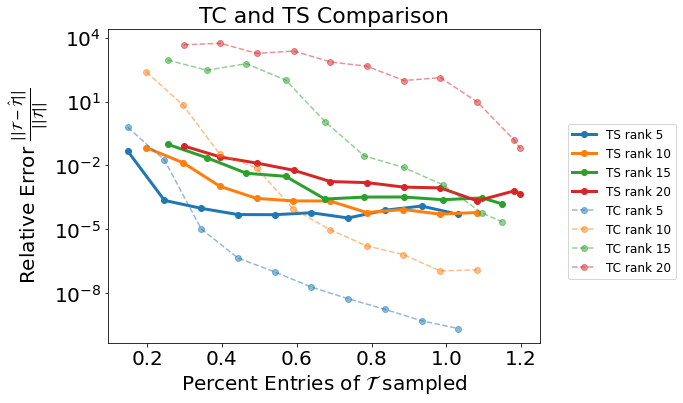

In [9]:
fig,ax = plt.subplots(figsize=(8,6))
plt.rcParams['font.size'] = 20
#fig.suptitle("Relative Error by Sample Complexity", fontsize=22)

df=rank_study_summary_kron
for r in df['r'].unique(): 
        ax.plot(100*df[df['r']==r]['revealed'],df[df['r']==r]['rel_error_sand'], '-o',label='TS rank '+str(r),linewidth=3)
        
plt.gca().set_prop_cycle(None)
df=rank_study_summary_kron
for r in df['r'].unique(): 
        ax.plot((100)*df[df['r']==r]['revealed'],df[df['r']==r]['rel_error_tc_final'], '--o',alpha=0.5,label='TC rank '+str(r))
#plt.ylim(1e-6, 1e11) 
ax.set_title("TC and TS Comparison", fontsize=22)
ax.set(xlabel="Percent Entries of $\mathcal{T}$ sampled", ylabel=r"Relative Error $\frac{\||\mathcal{T}-\mathcal{\hat{T}}\||}{\||\mathcal{T}\||}$",yscale='log')
fig.legend(loc='center left',bbox_to_anchor=(1, 0.5),fontsize=12)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax.yaxis.set_tick_params(labelbottom=True)
fig.tight_layout() 
plt.show()
